# GRIP - The Spark Foundation :- Data Science & Business Analytics Intern
## Author : Akshay Pawar

## Task 1 : PREDICTION USING SUPERVISED ML
### Problem Statement :- 
<h3><u>- Predict the percentage of an student based on the no. of study hours. This is a simple linear regression task as it involves just 2 variables.</u></h3>

In [43]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [45]:
print("Data imported successfully")
data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
data.shape

(25, 2)

In [8]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
data.groupby(['Hours'])['Scores'].mean()

Hours
1.1    17.0
1.5    20.0
1.9    24.0
2.5    25.5
2.7    27.5
3.2    27.0
3.3    42.0
3.5    30.0
3.8    35.0
4.5    41.0
4.8    54.0
5.1    47.0
5.5    60.0
5.9    62.0
6.1    67.0
6.9    76.0
7.4    69.0
7.7    85.0
7.8    86.0
8.3    81.0
8.5    75.0
8.9    95.0
9.2    88.0
Name: Scores, dtype: float64

## - Exploring the dataset

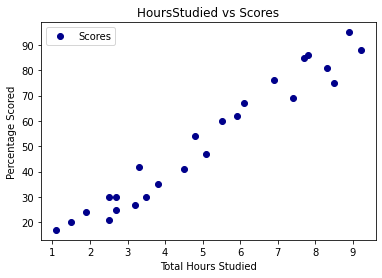

In [25]:
data.plot(x='Hours', y='Scores', style='o', color='darkblue')
plt.title('HoursStudied vs Scores')
plt.xlabel('Total Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

In [14]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## - Dividing the data into attributes(inputs) and labels (outputs).

In [16]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [17]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [18]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## - Splitting the dataset into the Training set and Test set

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

## - Training the Model

In [20]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(x_train, y_train) 

print("Training complete.")

Training complete.


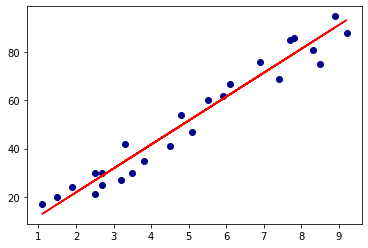

In [24]:
# Plotting the regression line
line = reg.coef_*x + reg.intercept_

# Plotting for the test data
plt.scatter(x, y, color = 'darkblue')
plt.plot(x, line, color = 'red');
plt.show()

In [26]:
# Checking the accuracy of the model by using the SCORE() Method 
acc = reg.score(x_train, y_train)
print("The accuracy of the Linear Regression Model is : ", acc)

The accuracy of the Linear Regression Model is :  0.9484509249326872


## - Predictions

In [27]:
print(x_test) 
y_pred = reg.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [28]:
# Comparing Actual vs Predicted
p_data = pd.DataFrame({'ACTUAL SCORE':y_test,'PREDICTED SCORE':y_pred})
p_data

,ACTUAL SCORE,PREDICTED SCORE
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [42]:
#What will be the predicted score if a student studies for 9.25 hrs/day?
Hours = np.array([[9.25]])
predict = reg.predict(Hours)
print("No of Hours Studied = {}".format(Hours))
print("Predicted Score(Percentage) = {}".format(predict[0]))

No of Hours Studied = [[9.25]]
Predicted Score(Percentage) = 93.89272889341652


## - Checking accuracy of our model

In [31]:
print("Train : ",reg.score(x_train,y_train)*100)
print("Test : ",reg.score(x_test,y_test)*100)

Train :  94.84509249326872
Test :  93.67661043365057


## - Evaluating the model

In [38]:
#Mean Absolute error
from sklearn import metrics  
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error :  4.130879918502482


In [39]:
#R-2 Score
from sklearn.metrics import r2_score
print(' R^2 : ', metrics.r2_score(y_test, y_pred))

 R^2 :  0.9367661043365056


In [35]:
#Mean Squared Eror
from sklearn.metrics import mean_squared_error
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred))

Mean Squared Error :  20.33292367497996
